In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Logistic regression generates predicted probability of default. How do we transform this prob into a score for each application? Normally we would prefer to give an application a higher score when the risk, or the prob of default is lower. Below is the function that can do that. 

In [3]:
# configure the mapping
base_score = 200 # rate when the chance of default is half and half, i.e., the odds of default/repayment is 1
pdo = 100 # points to double the odds

In [5]:
def prob_to_score(prob, base_score, pdo):
    s1 = math.log(prob/(1-prob))
    s2 = -s1 * pdo / math.log(2)
    s3 = s2 + base_score

    return s3

prob_to_score(0.5, base_score, pdo)

200.0

Sometimes, we may want to quickly infer the odds of repayment based on the score. Similarly, this can be done using the function below.

In [6]:
def score_to_odds(score, base_score, pdo):
    s1 = score - base_score
    s2 = -s1 * math.log(2) / pdo
    prob_default = math.exp(s2) / (1 + math.exp(s2))
    odds_repayment = (1 - prob_default) / prob_default

    return prob_default, odds_repayment

score_to_odds(200, base_score, pdo)

(0.5, 1.0)

Now let's generate score-to-odds mapping for all the scores.

In [7]:
min_score = 200
max_score = 1500

In [8]:
np.arange(min_score, max_score+1)

array([ 200,  201,  202, ..., 1498, 1499, 1500])

In [10]:
score_mapping_df = pd.DataFrame()
for score in np.arange(min_score, max_score+1):
    prob_default, odds_repayment = score_to_odds(score, base_score, pdo)
    score_mapping = pd.DataFrame({
        'score': [score],
        'prob_default': [prob_default],
        'odds_repayment': [odds_repayment]
    })

    score_mapping_df = pd.concat([score_mapping_df.copy(), score_mapping], axis = 0)

In [12]:
# check out the df generated and how the odds of repayment double with every 100 score increase
every_100_score = np.arange(200, 1500, 100)
score_mapping_df.query('score in @every_100_score')

,score,prob_default,odds_repayment
0,200,0.500000,1.0
0,300,0.333333,2.0
0,400,0.200000,4.0
0,500,0.111111,8.0
0,600,0.058824,16.0
0,700,0.030303,32.0
0,800,0.015385,64.0
0,900,0.007752,128.0
0,1000,0.003891,256.0
0,1100,0.001949,512.0


The odds of repayment grow exponentially as the scores increase. If we plot the score and odds on a log-transformed y-axis, it should be a straight line.

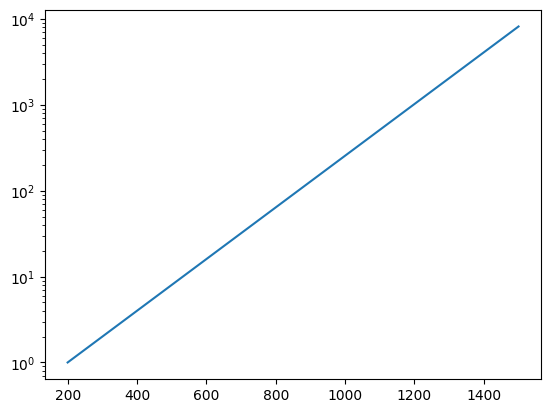

In [16]:
plt.plot(score_mapping_df['score'], score_mapping_df['odds_repayment'])
plt.yscale("log")
plt.show()